# Does your simulation have a ring current

Rowan Brown | 12.03.2025

Convective plumes *should* develop ring currents as isopycnals are steepened from their mean state, provided they are large enough, due to the thermal wind balance. See Sohail (2020) for a nice and more complete overview of the theory. 

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import xmitgcm
import matplotlib.pylab as plt
import xmitgcm.file_utils
import xmitgcm.utils
from MITgcmutils import density
import xarray as xr
import basic_model_anayses as bma
import gsw

In [23]:
# Open the dataset
#ds = bma.open_mitgcm_output_all_vars('../MITgcm/so_plumes/mrb_035')
ds = bma.open_mitgcm_output_all_vars('../../../work/projects/p_so-clim/GCM_data/RowanMITgcm/mrb_034')

In [24]:
# Co-locating the velocities
ds = bma.colocate_velocities(ds)

/albedo/home/robrow001/.venv/lib/python3.9/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/albedo/home/robrow001/.venv/lib/python3.9/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  out_dim: grid._ds.dims[out_dim] for arg in out_core_dims for out_dim in arg
/albedo/home/robrow001/.venv/lib/python3.9/site-packages/xgcm/grid_ufunc.py:832: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future

In [25]:
# Taking the variable means in time
ds = ds.mean(dim='time')

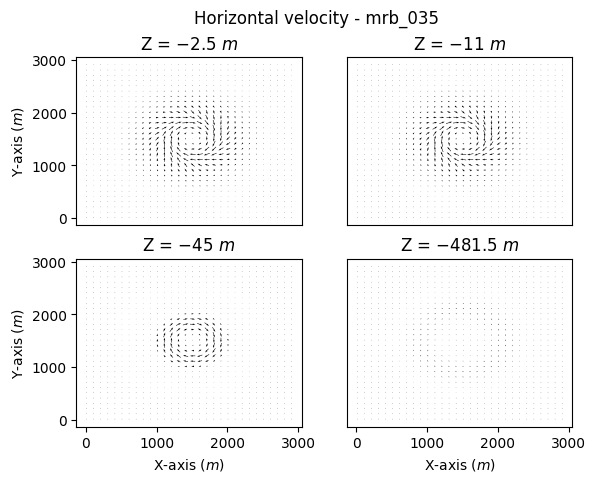

In [19]:
# Plotting horizontal-plane velocities
fig, axs = plt.subplots(ncols=2,nrows=2)
axs = axs.flatten()
n = 5 # Plot every nth arrow/cell/datapoint
ds.isel(XC=slice(None,None,n),YC=slice(None,None,n),Z=2).plot.quiver(x='XC',y='YC',u='U',v='V',scale=0.33*n,add_guide=False,ax=axs[0])
axs[0].set_title('Z = $-2.5$ $m$')
axs[0].set_ylabel('Y-axis ($m$)')
axs[0].get_xaxis().set_visible(False)
ds.isel(XC=slice(None,None,n),YC=slice(None,None,n),Z=8).plot.quiver(x='XC',y='YC',u='U',v='V',scale=0.33*n,add_guide=False,ax=axs[1])
axs[1].set_title('Z = $-11$ $m$')
axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)
ds.isel(XC=slice(None,None,n),YC=slice(None,None,n),Z=20).plot.quiver(x='XC',y='YC',u='U',v='V',scale=0.33*n,add_guide=False,ax=axs[2])
axs[2].set_title('Z = $-45$ $m$')
axs[2].set_xlabel('X-axis ($m$)')
axs[2].set_ylabel('Y-axis ($m$)')
ds.isel(XC=slice(None,None,n),YC=slice(None,None,n),Z=49).plot.quiver(x='XC',y='YC',u='U',v='V',scale=0.33*n,add_guide=False,ax=axs[3])
axs[3].set_title('Z = $-481.5$ $m$')
axs[3].set_xlabel('X-axis ($m$)')
axs[3].get_yaxis().set_visible(False)
plt.suptitle('Horizontal velocity - mrb_035')
plt.savefig('ring_current_mrb_035.png',dpi=1200)

Since we're in the Southern Hemisphere, the current is expected to be clockwise. This is because the buoyancy flux depresses the centre of the plume and therefore if we look from the edge of the plume inwards, we are looking from higher to lower pressure and Coriolis will divert the flow to the left. 

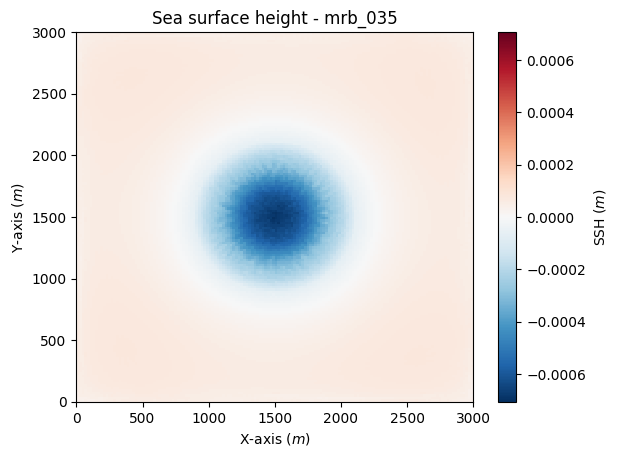

In [20]:
# Plotting the sea surface height
fig, ax = plt.subplots()
xr.plot.pcolormesh(ds['Eta'],ax=ax,cbar_kwargs={'label':'SSH ($m$)'})
ax.set_title('Sea surface height - mrb_035')
ax.set_ylabel('Y-axis ($m$)')
ax.set_xlabel('X-axis ($m$)')
plt.savefig('SSH_mrb_035.png',dpi=1200)

In [40]:
# Checking isobars
ds = bma.open_mitgcm_output_all_vars('../../../work/projects/p_so-clim/GCM_data/RowanMITgcm/mrb_034')
ds = bma.calculate_pressure(ds,g=9.81) # Note I *think* g is correct and I *think* this function works with TEOS10

UPDATE THIS TO USE RHOREF AND MAYBE PREF WITH TEOS


34.11209
34.109127


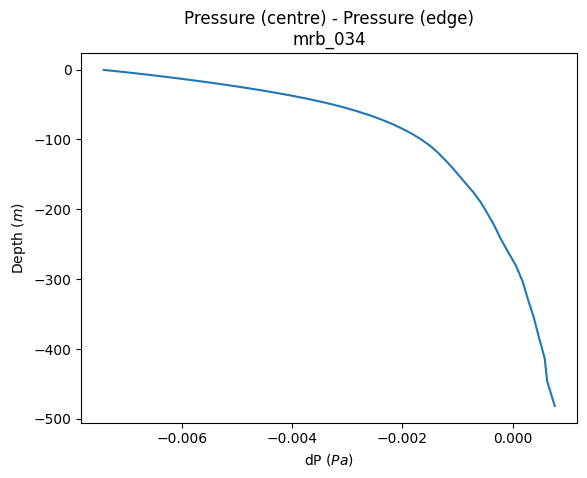

In [26]:
fig, ax = plt.subplots()
p_anom = ds['PH'].isel(YC=75,XC=75) - ds['PH'].isel(YC=140,XC=140)
print(ds['PH'].isel(YC=140,XC=140).mean().values)
print(ds['PH'].isel(YC=75,XC=75).mean().values)
p_anom.plot(ax=ax,y='Z')
ax.set_title('Pressure (centre) - Pressure (edge)\nmrb_034')
ax.set_ylabel('Depth ($m$)')
ax.set_xlabel('dP ($Pa$)')
plt.savefig('pressure_anom_mrb_034.png',dpi=1200)

#...... I'm realising that beta is wrong D'OH
#...... There is a clear thermal wind (geostrophic shear)
